In [134]:
import ast
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import chessboard as cb
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [135]:
row = [0, 1] * 4
board = [row[::-1] if i%2 == 1 else row for i in range(1, 9)]
board

[[1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 0, 1]]

In [136]:
# Read the .csv file with the preprocessed data.
df = pd.read_csv("chess_app.csv", dtype={"pawns": int, "knights": int, "bishops": int,
                                         "rooks": int, "queens": int},
                 converters={"wKing_sqr": ast.literal_eval, "bKing_sqr": ast.literal_eval})

# Read the .csv file with the preprocessed data.
df_ = pd.read_csv("chess_app.csv", dtype={"pawns": int, "knights": int, "bishops": int,
                                         "rooks": int, "queens": int})

In [137]:
df.head(1).bKing_sqr[0]

(1, 4)

In [138]:
def board_output(vector):

    brd = np.zeros((8, 8))
    for tup in vector:
        brd[tup] += 1

    return pd.DataFrame(brd)

In [160]:
df1 = board_output(df["bKing_sqr"])
df1

,0,1,2,3,4,5,6,7
0,3583.0,10739.0,20186.0,9122.0,52604.0,17400.0,127851.0,32891.0
1,3101.0,4610.0,6835.0,10108.0,13747.0,15370.0,24337.0,20617.0
2,2603.0,3768.0,4879.0,6201.0,7371.0,9332.0,9178.0,8279.0
3,2067.0,2155.0,3037.0,3250.0,3983.0,4780.0,4443.0,4173.0
4,1649.0,2032.0,2230.0,2254.0,2546.0,3162.0,3148.0,2790.0
5,1353.0,1742.0,1870.0,1745.0,1807.0,2421.0,2391.0,1662.0
6,985.0,1035.0,1154.0,851.0,992.0,1189.0,953.0,835.0
7,724.0,616.0,570.0,542.0,531.0,503.0,511.0,607.0


In [162]:
x_coords = ["A", "B", "C", "D", "E", "F", "G", "H"]
replacer = {i: x for i, x in enumerate(x_coords)}
replacer

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H'}

In [236]:
df2 = df1.stack().reset_index().rename(columns={"level_0":"rows","level_1":"cols",0:"freq"})
df2.iloc[:,0:2] = df2.iloc[:,0:2].apply(lambda x:x)
df2["letters"] = df2.cols.replace(replacer)

In [237]:
df2["count"] = df2["freq"]
df2["freq"] = np.round(df2["freq"] / df2["freq"].sum() * 100, 2)

In [238]:
df2.freq

0      0.72
1      2.15
2      4.04
3      1.82
4     10.52
      ...  
59     0.11
60     0.11
61     0.10
62     0.10
63     0.12
Name: freq, Length: 64, dtype: float64

In [257]:
def getChessboard(dimensions: int = 500, margin: int = 50):
    row = [0, 1] * 4
    boardmatrix = [row[::-1] if i % 2 == 1 else row for i in range(1, 9)]

    chessboard = go.Figure(
        layout=dict(
            margin=dict(l=margin, r=margin, t=margin, b=margin, pad=10),
            width=dimensions,
            height=dimensions,
            plot_bgcolor="rgba(0,0,0,0)",
            paper_bgcolor="rgba(0,0,0,0)",
            font_color="white",
            coloraxis_showscale=False,
            yaxis=dict(
                range=[-0.5, 7.5],
                color="white",
                tickfont_size=12,
                fixedrange=True,
                tickmode="array",
                tickvals=list(range(0, 8)),
                ticktext=list(range(1, 9)),
            ),
            xaxis=dict(
                range=[-0.5, 7.5],
                color="white",
                tickfont_size=12,
                fixedrange=True,
                tickmode="array",
                tickvals=list(range(0, 8)),
                ticktext=["A", "B", "C", "D", "E", "F", "G", "H"],
            ),
        )
    )
    chessboard.add_trace(
        go.Heatmap(
            x=list(range(0, 8)),
            y=list(range(0, 8)),
            x0=0,
            y0=0,
            dx=0,
            z=boardmatrix,
            hoverinfo="none",
            name="Chess Board",
            colorscale=["white", "black"],
            showscale=False,
        )
    )

    return chessboard

In [260]:
def getHeatmap(dataframe: pd.DataFrame):
    """DataFrame must have columns named:
    rows => 1 to 8
    letters => A to H
    freq => frequency"""
    freq = np.round(df2["freq"] / df2["freq"].sum() * 100, 2)
    heatmap = go.Scatter(
        x0=0,
        y0=0,
        dx=0,
        x=dataframe["cols"],
        y=dataframe["rows"],
        name="",
        mode="markers",
        opacity=1,
        marker_symbol="square",
        marker_line_color="#c12917",
        marker_size=freq,
        marker_sizeref=freq.max()/40,
        marker_sizemin=0,
        marker_sizemode="diameter",
        marker_opacity=1,
        marker_color="#c12917",
        hovertext=freq,
        hoverinfo="all",
        # TODO
        hovertemplate="<b>Test</b>: %{hovertext} - %{marker_size}<br>number: 1<extra></extra>",
    )
    return heatmap

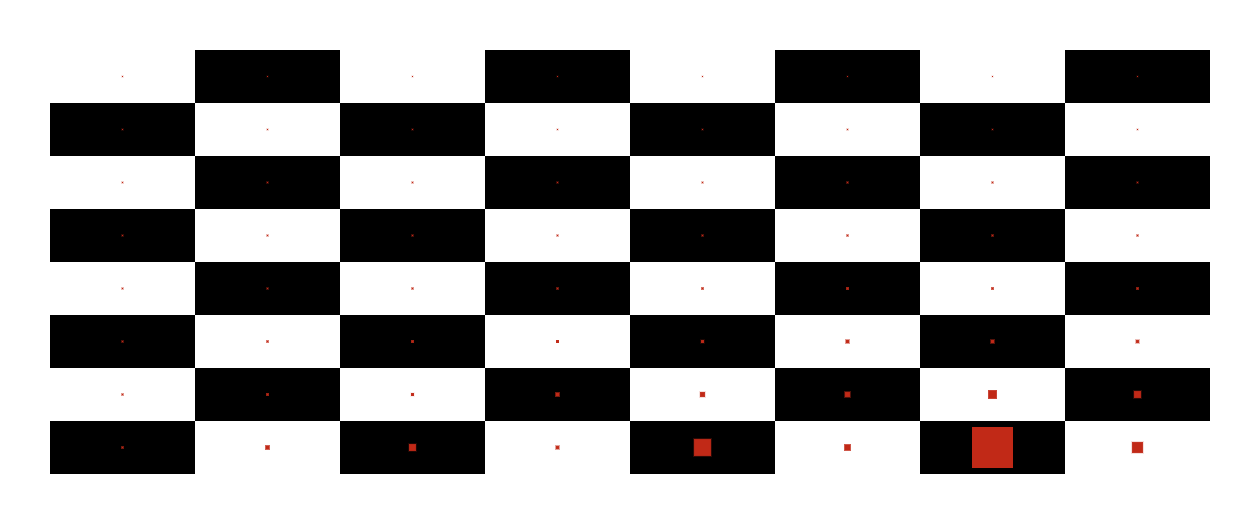

In [261]:
fig = getChessboard()

fig.add_trace(getHeatmap(df2))

fig.show(
    config={"displayModeBar": False, "scrollZoom": False, "showAxisDragHandles": False}
)